In [1]:
import tensorflow
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14683730439577226081
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2357670708
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18389562269007066999
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


# Karim Ayman 156422
### Predict Students Academic Success and Dropout Dataset.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install mlxtend

### Imports

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import randint

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure

import sklearn
from sklearn.metrics import precision_score, recall_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, f1_score,accuracy_score

import math

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### Dataset Features, Description and Visualization

In [4]:
kdata = pd.read_csv('students_dropout.csv')
kdata.shape

(4424, 37)

In [5]:
kdata.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
kdata.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


#### The min, max and mean values of several columns indicate that thay have outliers.
#### Visualizing with histograms.

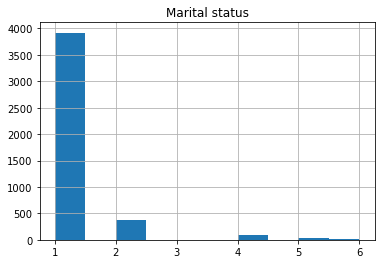

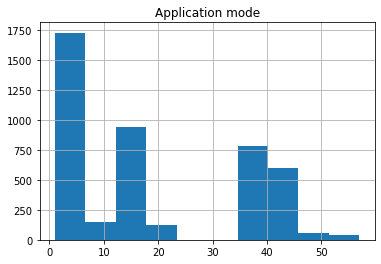

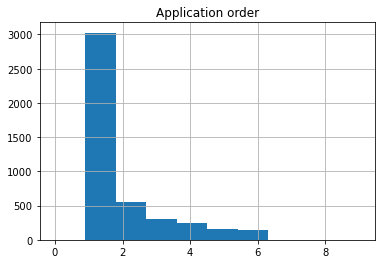

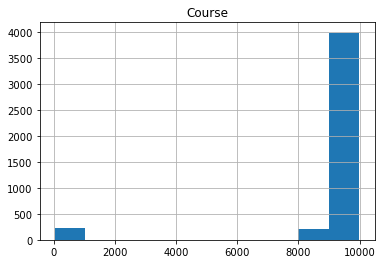

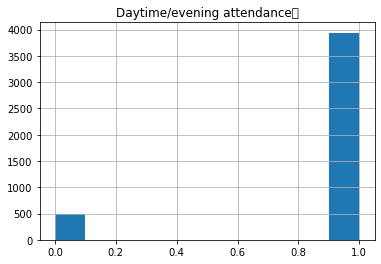

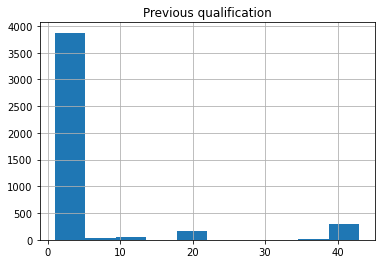

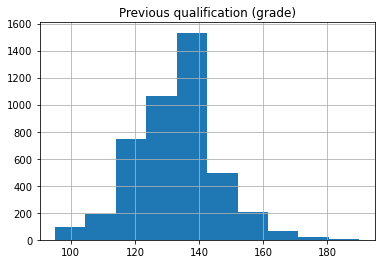

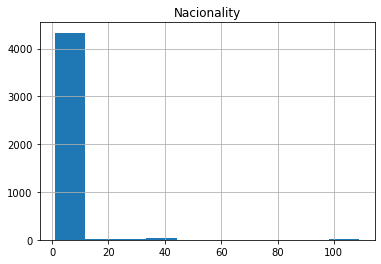

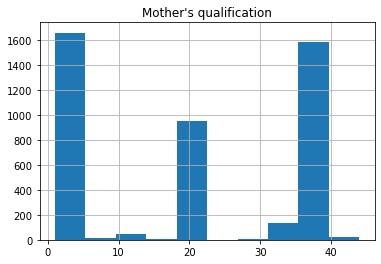

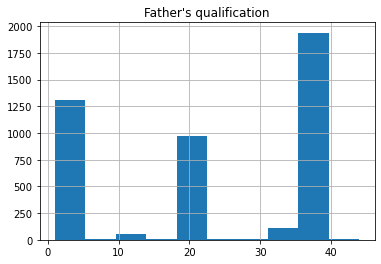

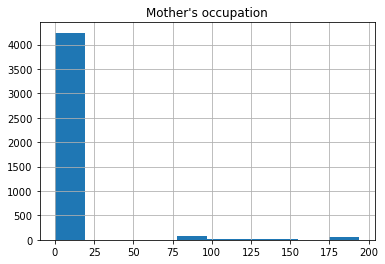

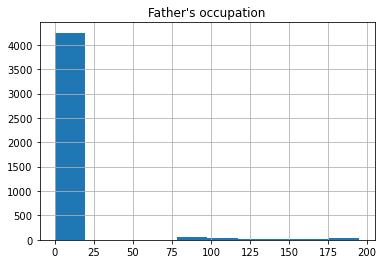

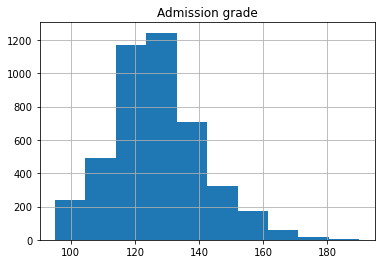

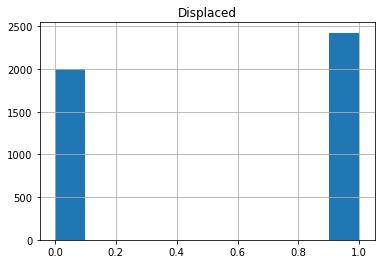

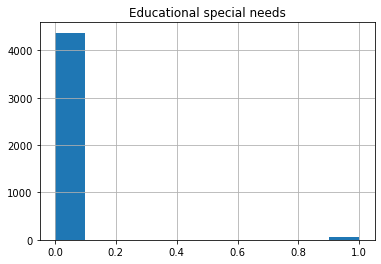

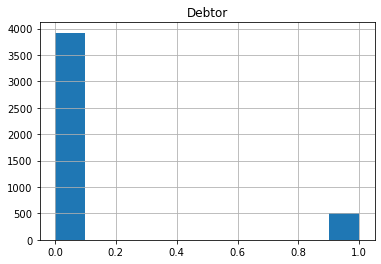

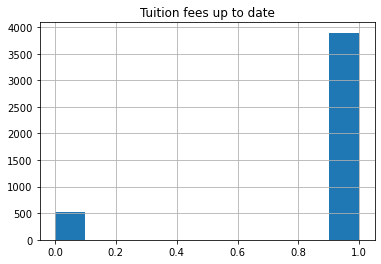

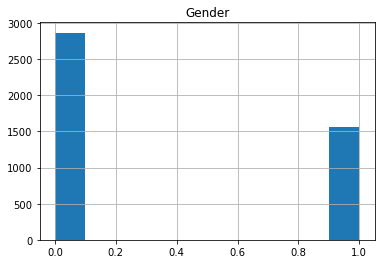

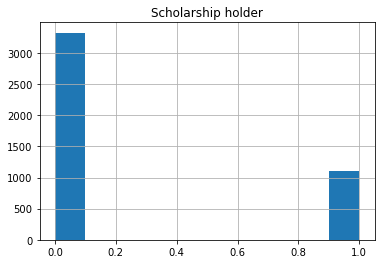

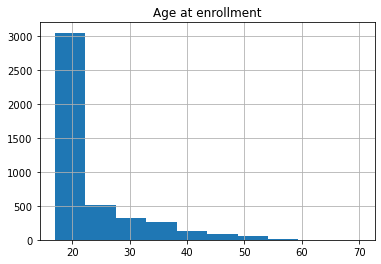

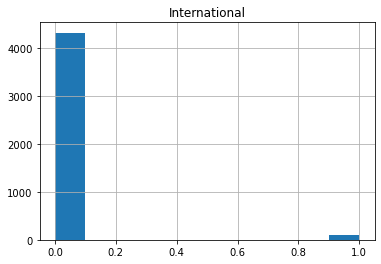

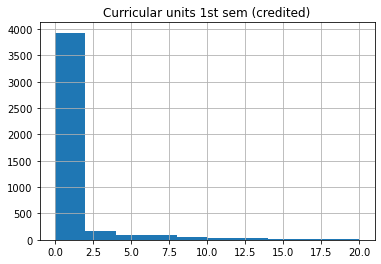

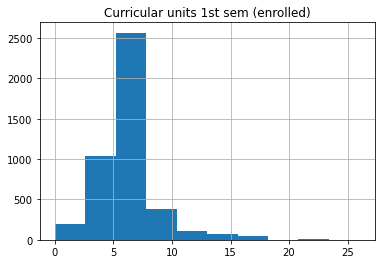

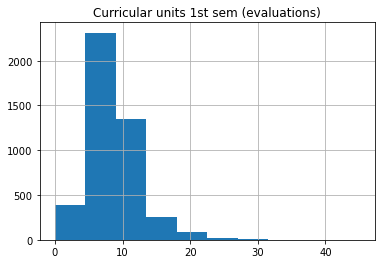

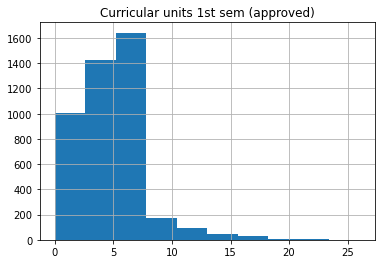

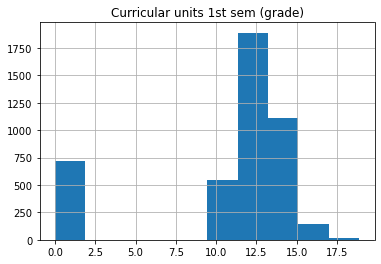

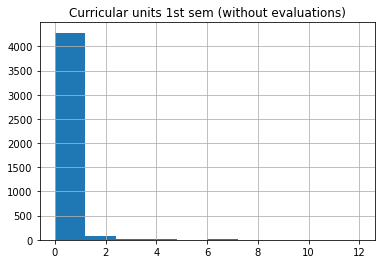

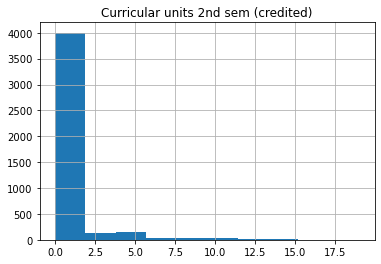

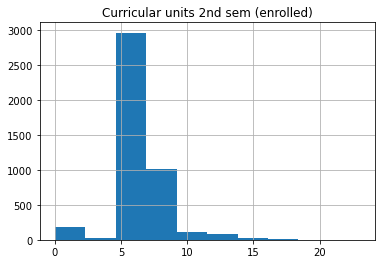

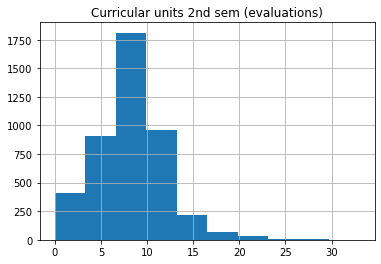

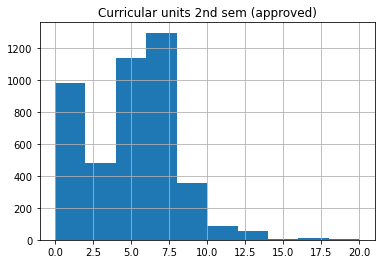

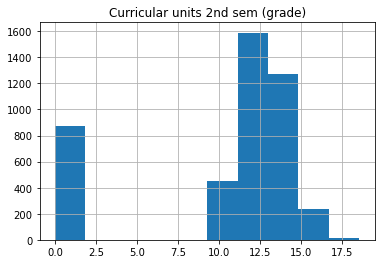

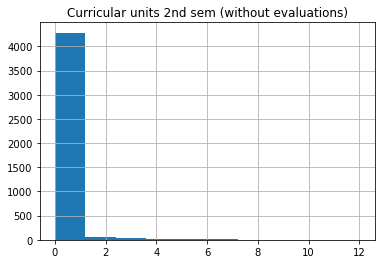

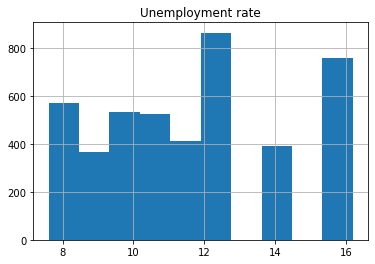

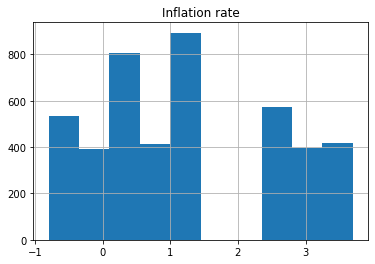

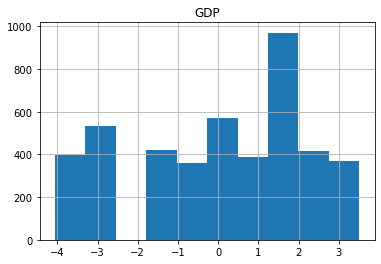

In [7]:
for i in range(0, (kdata.shape[1]-1)):
    kdata.iloc[:,i].hist()
    plt.title(kdata.columns[i])
    plt.title(kdata.columns[i])
    plt.show()

#### By looking at the histograms of each feature, there definetly are outliers.

#### Now, we will make sure that the "Target" column is clean and has no null values and create a new column named "Target_Class" to label each nominal class.

In [8]:
kdata.isna().sum() #The dataset is clean and has no null values

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [9]:
kdata['Target_Class'] = [[0] for i in range(0, kdata.shape[0])]
for i in range(0, kdata.shape[0]):
    if kdata.Target[i] == "Dropout":
        kdata['Target_Class'][i] = 0
    elif kdata.Target[i] == "Enrolled":
        kdata['Target_Class'][i] = 1
    else:
        kdata['Target_Class'][i] = 2

In [10]:
kdata.head(100)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Target_Class
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,15,1,9119,1,1,130.0,26,38,3,...,5,11,3,13.250000,0,13.9,-0.3,0.79,Enrolled,1
96,1,1,5,9773,1,1,135.0,1,37,1,...,6,6,6,13.333333,0,8.9,1.4,3.51,Graduate,2
97,1,1,5,9500,1,1,132.0,1,37,37,...,8,9,8,14.477778,0,12.4,0.5,1.79,Graduate,2
98,1,1,1,9085,1,1,135.0,1,1,2,...,5,7,5,13.800000,0,12.7,3.7,-1.70,Enrolled,1


In [11]:
#Highly Complex
#sns.pairplot(kdata, hue='Target')

## We are going to have two different approaches here.
### First Approach: Use Machine Learning on the current dataset.
### Second Approach: Use Machine Learning after pre-processing the data.

# First Approach

## Model 1: Decision Tree Classifier.

In [12]:
x=kdata.iloc[:, 0:36]
y=kdata.Target_Class.astype('int')

# We will follow the 70% 30% training and testing records.
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, stratify=kdata.Target_Class.astype('int'), random_state=10)

### A plot for comparing features prioritized by each model.

In [13]:
def plot_feature_importances(model):
    n_features = kdata.shape[1]-2
    plt.figure(figsize=(20,16))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), kdata.columns[0:36].values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

In [14]:
model1 = DecisionTreeClassifier()
model1.fit(X_train1, y_train1)
print("Accuracy on training set: {:.3f}".format(model1.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(model1.score(X_test1, y_test1)))

Accuracy on training set: 1.000
Accuracy on test set: 0.681


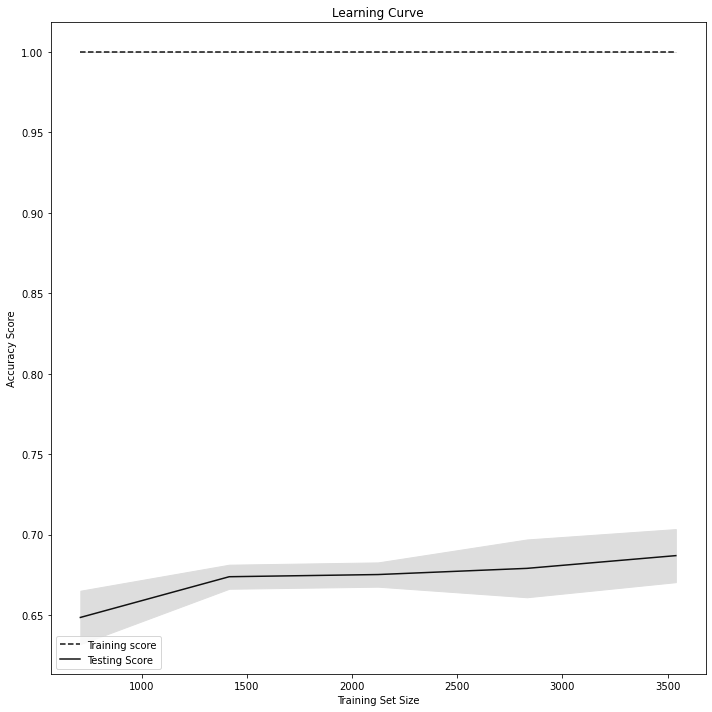

In [15]:
train_sizes, train_scores, test_scores =\
learning_curve(model1, x, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### The model's accuracy on the training set is much higher than on the testing set. This can indicate that the model overfitted the data. ln order to try to increase the model's accuracy on the test set, We will re-run the model but with only 25% of the data for testing. Thus, exposing the model for more data to learn from.

In [16]:
X_train1_2, X_test1_2, y_train1_2, y_test1_2 = train_test_split(x, y, test_size=0.25, stratify=kdata.Target_Class.astype('int'), random_state=10)
model1_2 = DecisionTreeClassifier()
model1_2.fit(X_train1_2, y_train1_2)
print("Accuracy on training set: {:.3f}".format(model1_2.score(X_train1_2, y_train1_2)))
print("Accuracy on test set: {:.3f}".format(model1_2.score(X_test1_2, y_test1_2)))

Accuracy on training set: 1.000
Accuracy on test set: 0.714


#### The model's accuracy increased by 3.3% which is not good. So next, we will tune the hyperparameters of the decision tree for better accuracy on the testing set.

In [17]:
#We will continue with 25% of the data for training and will choose the closest fitting accuracy for max tree depth and min
#samples required for splitting.

trainScore=0
testScore=0
maxDepth=0
minSamples=0

for i in range(1,10):
    for j in range(2,10):
        model1_3 = DecisionTreeClassifier(max_depth=i, min_samples_split =j, random_state=0)
        model1_3.fit(X_train1_2, y_train1_2)
        trainScoreN= model1_3.score(X_train1_2, y_train1_2)
        testScoreN= model1_3.score(X_test1_2, y_test1_2)
        if (trainScoreN >= trainScore) & (testScoreN > testScore):
            trainScore=trainScoreN
            testScore=testScoreN
            maxDepth=i
            minSamples=j
            
print("Best Test score on max depth = " + str(maxDepth) + " and min samples = " + str(minSamples))

Best Test score on max depth = 7 and min samples = 2


#### After running the loop, it turns that the best accuracy on the testing set was when having 7 tree deep levels and min samples of splitting = 2. Let's see the accuracy number.

In [18]:
model1_3 = DecisionTreeClassifier(max_depth=7, min_samples_split =2, random_state=10)
model1_3.fit(X_train1_2, y_train1_2)
trainScoreN= model1_3.score(X_train1_2, y_train1_2)
testScoreN= model1_3.score(X_test1_2, y_test1_2)

print("Accuracy on training set: {:.3f}".format(trainScoreN))
print("Accuracy on testing set: {:.3f}".format(testScoreN))

Accuracy on training set: 0.809
Accuracy on testing set: 0.758


#### Although the accuracy on the training set decreased by 19.1%, the accuracy on the testing set increased by 4.4%.

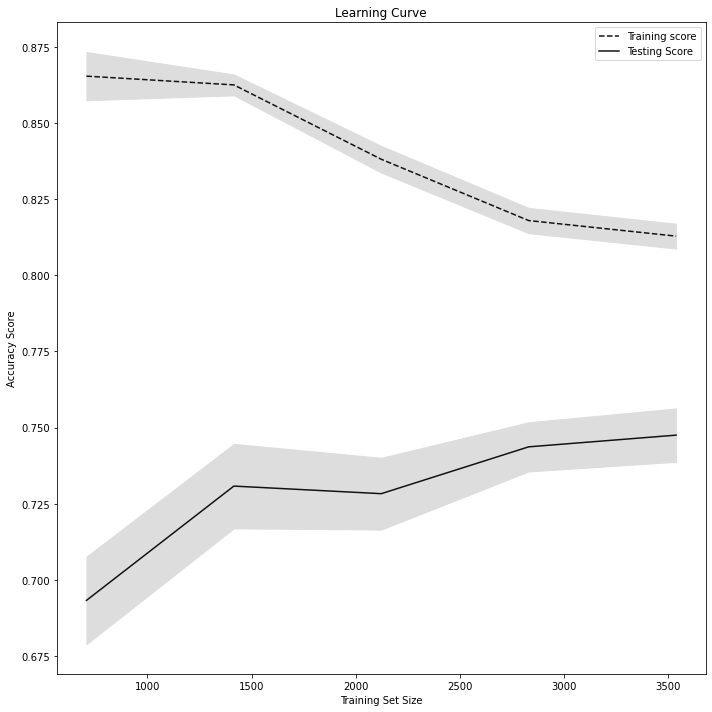

In [19]:
train_sizes, train_scores, test_scores =\
learning_curve(model1_3, x, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### The Confusion Matrix for the last model. (Model 1_3)

Confusion Matrix of DT with customizing depth=7 and minimum samples split=2


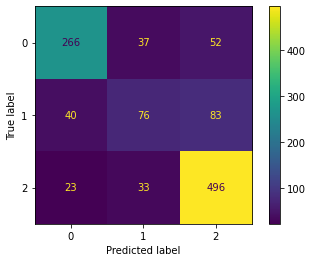

In [20]:
print("Confusion Matrix of DT with customizing depth=7 and minimum samples split=2")
y_pred1 = model1_3.predict(X_test1_2)
confusion = confusion_matrix(y_test1_2, y_pred1)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

### The confusion matrix illustrates that the class that had the worst predicitons is class 1 which refers to 'Enrolled' Students.

In [21]:
target_names = ['Dropout','Enrolled', 'Graduate']
print(classification_report(y_test1_2, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

     Dropout       0.81      0.75      0.78       355
    Enrolled       0.52      0.38      0.44       199
    Graduate       0.79      0.90      0.84       552

    accuracy                           0.76      1106
   macro avg       0.71      0.68      0.69      1106
weighted avg       0.75      0.76      0.75      1106



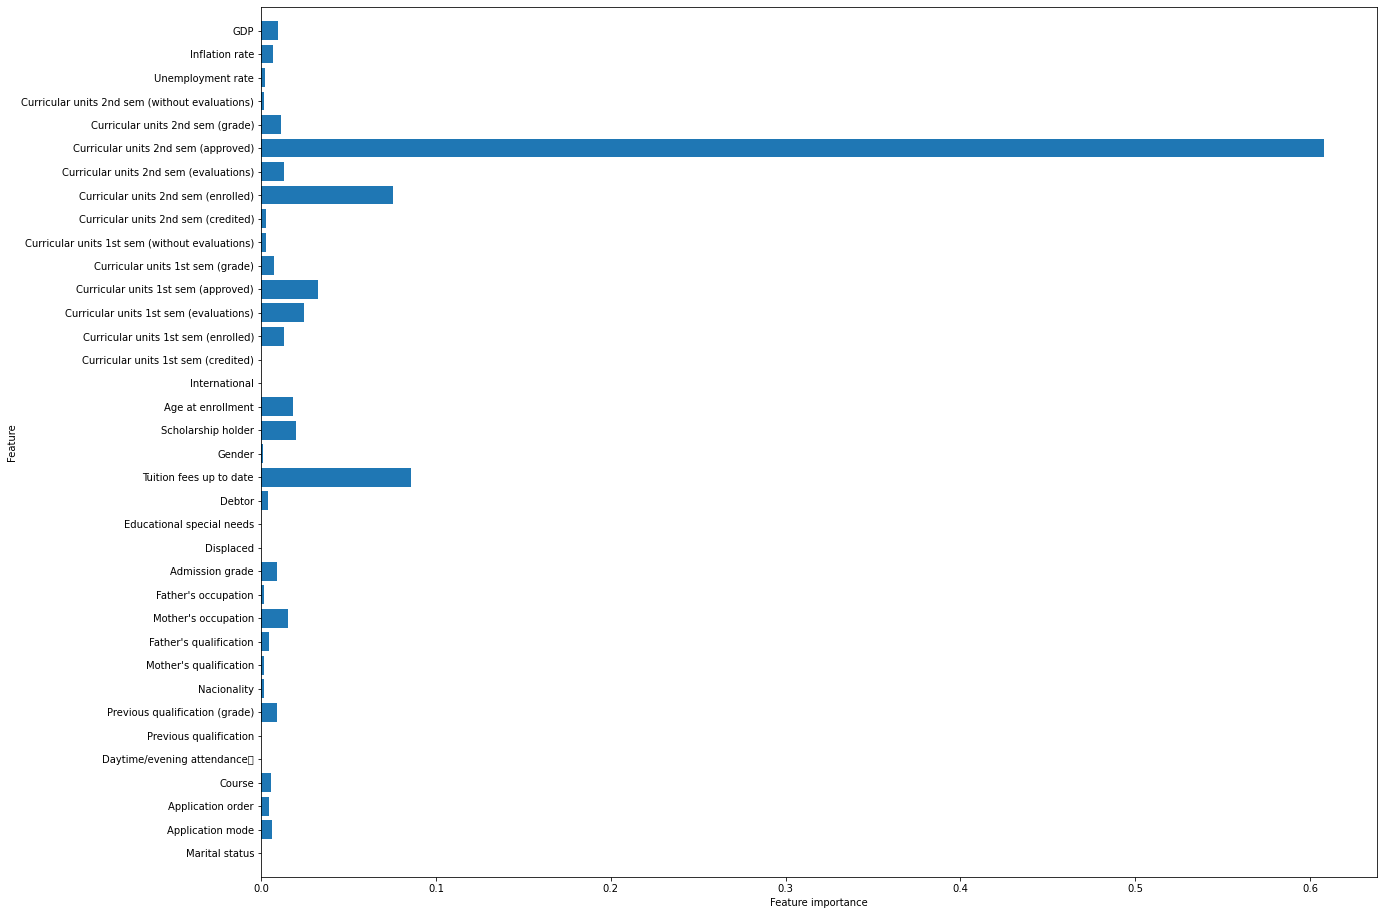

In [22]:
plot_feature_importances(model1_3)

## By examining the model's features importance, features like 'Gender', 'Nacionality', Marital status', 'International' among others were irrelevant to the learning process.

## ----------------------------------------------------------------------------------------------------------------------------------

## Model 2: K Nearest Neighbor Classifier.
### In this section, another model based on KNN Alogrithm will be trained on the same training and testing samples (75%-25%) from the Decision Tree.

In [23]:
model2 = KNeighborsClassifier()
model2.fit(X_train1_2, y_train1_2)
trainScoreN= model2.score(X_train1_2, y_train1_2)
testScoreN= model2.score(X_test1_2, y_test1_2)

print("Accuracy on training set: {:.3f}".format(trainScoreN))
print("Accuracy on testing set: {:.3f}".format(testScoreN))

Accuracy on training set: 0.720
Accuracy on testing set: 0.620


### We will try to tune the KNN model in order to get the best testing accuracy.

In [24]:
k_range = range(1,12)
scores = []
for i in k_range:
    model2_2 = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    model2_2.fit(X_train1_2, y_train1_2)
    y_pred2 = model2_2.predict(X_test1_2)
    scores.append(metrics.accuracy_score(y_test1_2, y_pred2))

Text(0, 0.5, 'Testing Accuracy')

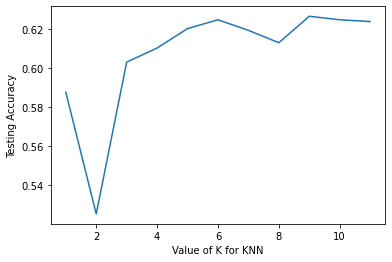

In [25]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### It seems that the testing accuracy is best at 9 neighbors in KNN. So, let's run the model again with 9 neighbors.

In [26]:
model2_2 = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
model2_2.fit(X_train1_2, y_train1_2)
trainScoreN= model2_2.score(X_train1_2, y_train1_2)
testScoreN= model2_2.score(X_test1_2, y_test1_2)

print("Accuracy on training set: {:.3f}".format(trainScoreN))
print("Accuracy on testing set: {:.3f}".format(testScoreN))

Accuracy on training set: 0.689
Accuracy on testing set: 0.627


### Only 0.7% increase in the accuracy of the testing set.

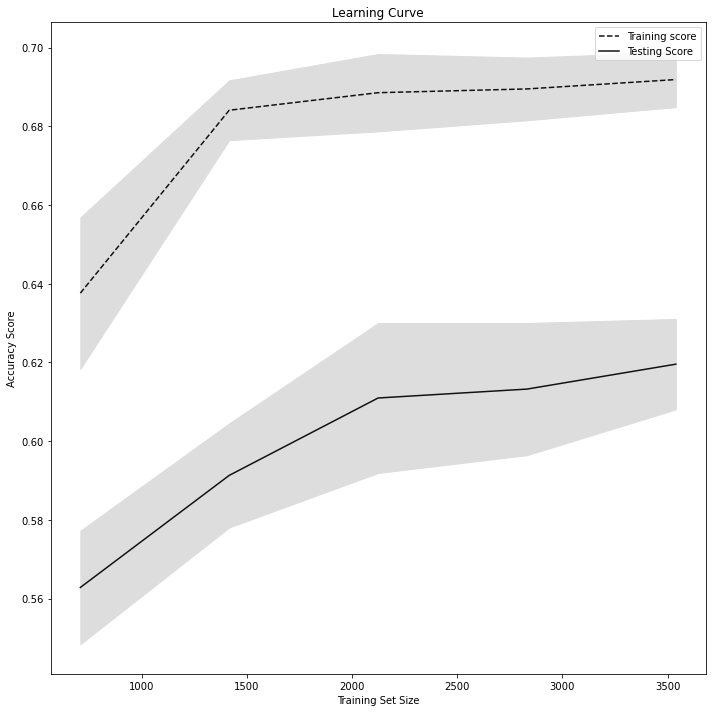

In [27]:
train_sizes, train_scores, test_scores =\
learning_curve(model2_2, x, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

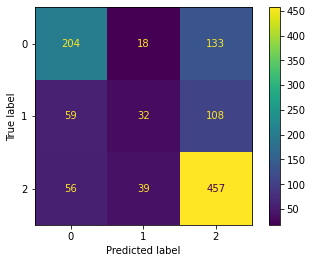

In [28]:
y_pred2 = model2_2.predict(X_test1_2)
confusion = confusion_matrix(y_test1_2, y_pred2)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

### The confusion matrix for the KNN based model shows that Classes 0 and 1 have the worst predictions. The classes corresponds to 'Dropout' and 'Enrolled' respectively. Model wrongly predicted over 40% of class 0 records and over 80% of class 1 records.

In [29]:
target_names = ['Dropout','Enrolled', 'Graduate']
print(classification_report(y_test1_2, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

     Dropout       0.64      0.57      0.61       355
    Enrolled       0.36      0.16      0.22       199
    Graduate       0.65      0.83      0.73       552

    accuracy                           0.63      1106
   macro avg       0.55      0.52      0.52      1106
weighted avg       0.60      0.63      0.60      1106



# --------------------------------------------------------------------------------------------------------------

## Model 3: Random Forrest Classifier.

In [30]:
model3 = RandomForestClassifier()
model3.fit(X_train1_2, y_train1_2)
trainScoreN= model3.score(X_train1_2, y_train1_2)
testScoreN= model3.score(X_test1_2, y_test1_2)

print("Accuracy on training set: {:.3f}".format(trainScoreN))
print("Accuracy on testing set: {:.3f}".format(testScoreN))

Accuracy on training set: 1.000
Accuracy on testing set: 0.769


### Now, we will try to fine tune the RF in order to get better accuracy on the testing set.

In [31]:
trainScoreN = 0
testScoreN = 0
est = 0
maxDepth = 0

for i in range(20,200,10):
    for j in range(1,15):
        model3_2 = RandomForestClassifier(n_estimators=i, max_depth=j)
        model3_2.fit(X_train1_2, y_train1_2)
        trainScore= model3_2.score(X_train1_2, y_train1_2)
        testScore= model3_2.score(X_test1_2, y_test1_2)
        if (trainScore >= trainScoreN) & (testScore > testScoreN):
            trainScoreN = trainScore
            testScoreN = testScore
            est = i
            maxDepth = j

print("Best Accuracy at n_estimators= " + str(est) + " and max depth= " + str(maxDepth))
print("Accuracy on training set: {:.3f}".format(trainScoreN))
print("Accuracy on testing set: {:.3f}".format(testScoreN))

Best Accuracy at n_estimators= 60 and max depth= 14
Accuracy on training set: 0.975
Accuracy on testing set: 0.782


### The fine tunning shows that the best accuracy on the testing set is obtained at n_estimators = 60, and max tree depth = 14. So let's fit a model with these hyperparameters.

In [32]:
model3_2 = RandomForestClassifier(n_estimators=est, max_depth=maxDepth)
model3_2.fit(X_train1_2, y_train1_2)

RandomForestClassifier(max_depth=14, n_estimators=60)

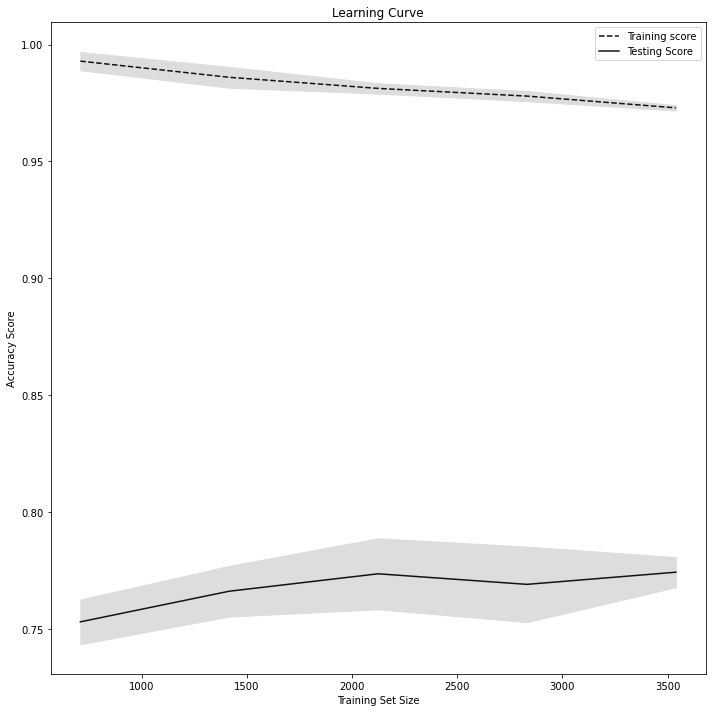

In [33]:
train_sizes, train_scores, test_scores =\
learning_curve(model3_2, x, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

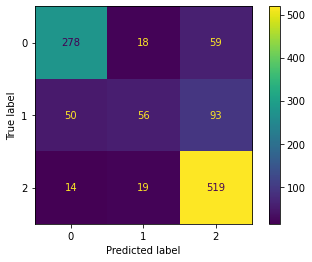

In [34]:
y_pred3 = model3_2.predict(X_test1_2)
confusion = confusion_matrix(y_test1_2, y_pred3)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

### The confusion matrix shows that class 1 ('Enrolled') has the worst predicitions.

In [35]:
target_names = ['Dropout','Enrolled', 'Graduate']
print(classification_report(y_test1_2, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

     Dropout       0.81      0.78      0.80       355
    Enrolled       0.60      0.28      0.38       199
    Graduate       0.77      0.94      0.85       552

    accuracy                           0.77      1106
   macro avg       0.73      0.67      0.68      1106
weighted avg       0.76      0.77      0.75      1106



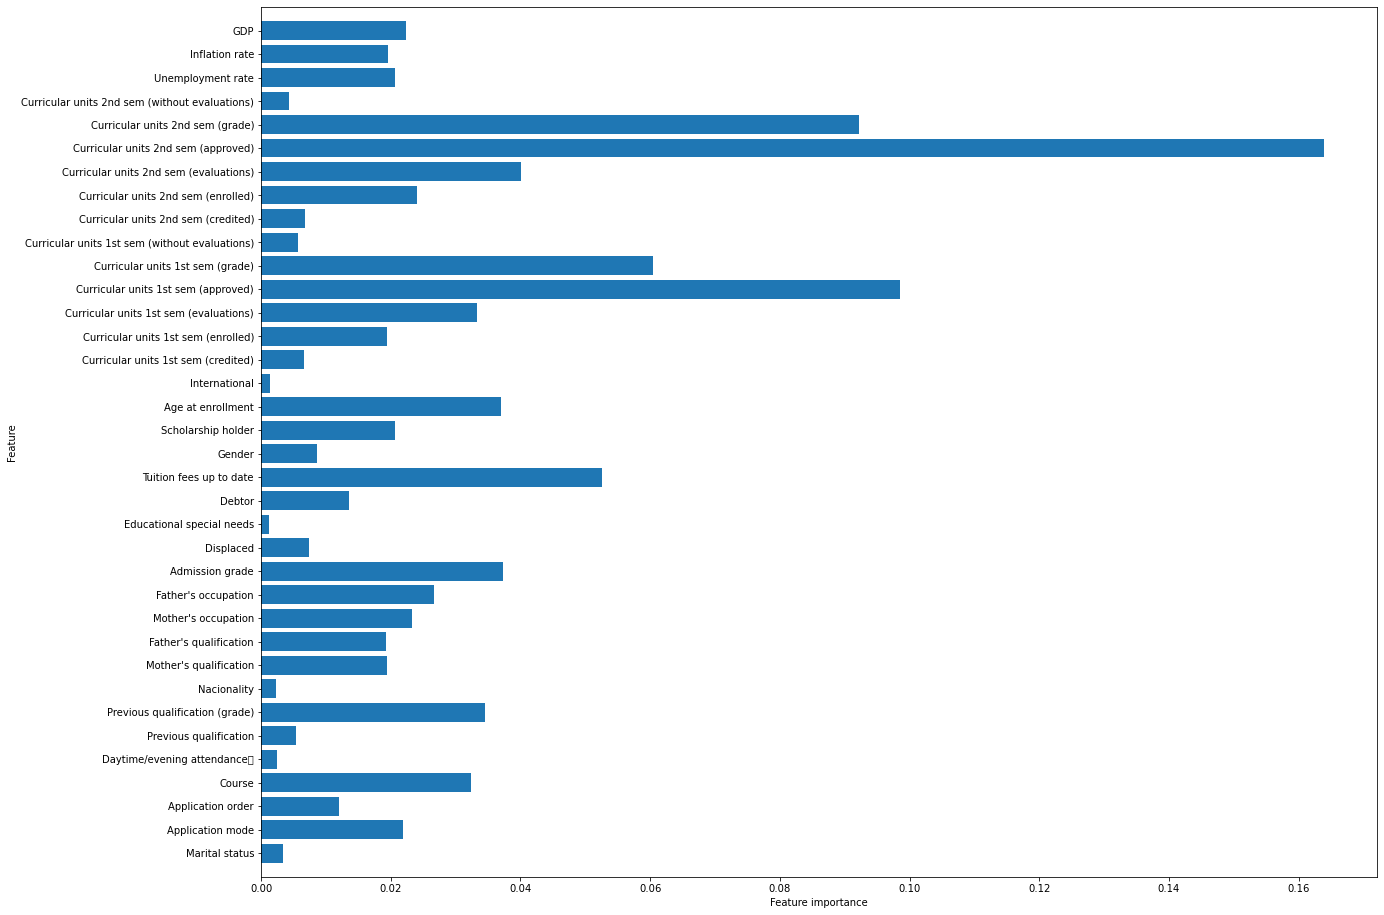

In [36]:
plot_feature_importances(model3_2)

### The Random Forest Classifier gave more weights to the features, unlike the Decision Tree Classifier. However, features like 'International' and 'Educational special needs' had low weights similar to DT.

# --------------------------------------------------------------------------------------------------------------

# Second Approach.

## The accuracy of the three models is not great. The Random Forest Classifier has the best accuracy but there is still a big gap between the training accuracy and the testing one. Now, we will perform some preprocessing for the data and re-fit the models again to see if there will be any better results.
## We are going to follow five steps.
### Step 1: Drop class '1', and turn the dataset into binary classification.
### Step 1: SBS to highlight the most important features of the dataset.
### Step 2: Drop features that seem irrelevant and biased towards a certain value as shown in the histogram and highlighted by SBS and prioritized features by every model.
### Step 3: Use IQR to solve outliers in specific features.
### Step 4: Plot a correlation heatmap to see if there are any strong correlations between features.
### Step 5: Initialize new Machine Learning models and fit again.

In [37]:
ekdata = pd.read_csv('students_dropout.csv')
ekdata

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [38]:
###DROPPING ENROLLED STUDENTS TO LIMIT THE CLASSES TO ONLY TWO###

enrolled_s = ekdata[(ekdata['Target'] == 'Enrolled')].index
ekdata.drop(enrolled_s , inplace=True)
ekdata.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [39]:
ekdata.shape

(3630, 37)

In [40]:
ekdata['Target_Class'] = [0 for i in range(0, ekdata.shape[0])]

for i in range(0, ekdata.shape[0]):
    if ekdata.iloc[i, 36] == "Dropout":
        ekdata['Target_Class'][i] = 0
    else:
        ekdata['Target_Class'][i] = 1

In [41]:
ex=ekdata.iloc[:, 0:35]
ey=ekdata.Target_Class

# We will follow the 75% 25% training and testing records split.
eX_train, eX_test, ey_train, ey_test = train_test_split(ex, ey, test_size=0.25, stratify=ekdata.Target_Class, random_state=10)

In [42]:
sbs = SFS(DecisionTreeClassifier(),
          k_features = (1, 10),
          forward= False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(eX_train, ey_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  35 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.3s finished

[2023-11-06 17:31:55] Features: 34/1 -- score: 0.5110245529930034[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.3s finished

[2023-11-06 17:31:55] Features: 33/1 -- score: 0.5220447870778268[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  33 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.3s finished

[2023-11-06 17:31:56] Features: 32/1 -- score: 0.5216787596095707[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of

[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-11-06 17:32:01] Features: 7/1 -- score: 0.5201957545132591[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2023-11-06 17:32:01] Features: 6/1 -- score: 0.5227822406495638[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2023-11-06 17:32:01] Features: 5/1 -- score: 0.5238689859203594[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2023-11-06 17:32:01] Features: 4/1 -- score: 

In [43]:
bdf = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
bdf = bdf[["feature_idx","avg_score"]]
bdf

,feature_idx,avg_score
35,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.479796
34,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.511025
33,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.522045
32,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.521679
31,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.520939
30,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.520938
29,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.518
28,"(0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...",0.516532
27,"(0, 1, 2, 3, 5, 6, 8, 9, 10, 12, 13, 14, 15, 1...",0.512485
26,"(0, 1, 2, 3, 5, 6, 8, 9, 10, 12, 13, 14, 15, 1...",0.506985


In [44]:
sbs.k_feature_names_

('Previous qualification',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)')

In [45]:
sbs.k_score_

0.5279147231579856

In [46]:
### DROPPING UNNECESSARY FEATURES ###
ekdata.drop(['Educational special needs', 'International', 'Marital status', 'Nacionality', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)'], axis=1, inplace=True)
ekdata.describe()

,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Class
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.00000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,18.421763,1.750138,8853.980992,0.887603,4.532231,132.920606,19.986226,22.571625,10.138567,10.28292,...,10.534860,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256,0.496694
std,17.358595,1.333831,2068.760082,0.315897,10.024134,13.238373,15.585278,15.275453,23.315697,22.40269,...,5.057694,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986,0.500058
min,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,2.000000,3.000000,4.000000,4.00000,...,11.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,19.000000,19.000000,5.000000,7.00000,...,12.341429,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000,0.000000
75%,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,37.000000,37.000000,9.000000,9.00000,...,13.500000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000,1.000000
max,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,44.000000,44.000000,194.000000,195.00000,...,18.875000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000


In [47]:
ekdata.columns

Index(['Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Mother's qualification',
       'Father's qualification', 'Mother's occupation', 'Father's occupation',
       'Admission grade', 'Displaced', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target', 'Target_Class'],
      dtype='object')

In [48]:
def drop_Outliers(x):
    q1 = ekdata.iloc[:,x].quantile(0.25)
    q3 = ekdata.iloc[:,x].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    ekdata.iloc[:,x] = ekdata.iloc[:,x].where((ekdata.iloc[:,x] >= lower_bound) & (ekdata.iloc[:,x] <= upper_bound))

In [49]:
drop_Outliers(2)

In [50]:
ekdata.isna().sum()

Application mode                                    0
Application order                                   0
Course                                            381
Daytime/evening attendance\t                        0
Previous qualification                              0
Previous qualification (grade)                      0
Mother's qualification                              0
Father's qualification                              0
Mother's occupation                                 0
Father's occupation                                 0
Admission grade                                     0
Displaced                                           0
Debtor                                              0
Tuition fees up to date                             0
Gender                                              0
Scholarship holder                                  0
Age at enrollment                                   0
Curricular units 1st sem (credited)                 0
Curricular units 1st sem (en

In [51]:
ekdata.dropna(axis=0, inplace=True)
ekdata.shape

(3249, 32)

### After dropping unnecessary features and removing outliers from 'Course'. We will define new training and testing sets and plot a correlation map to see if there are any strong correlations.

<AxesSubplot:>

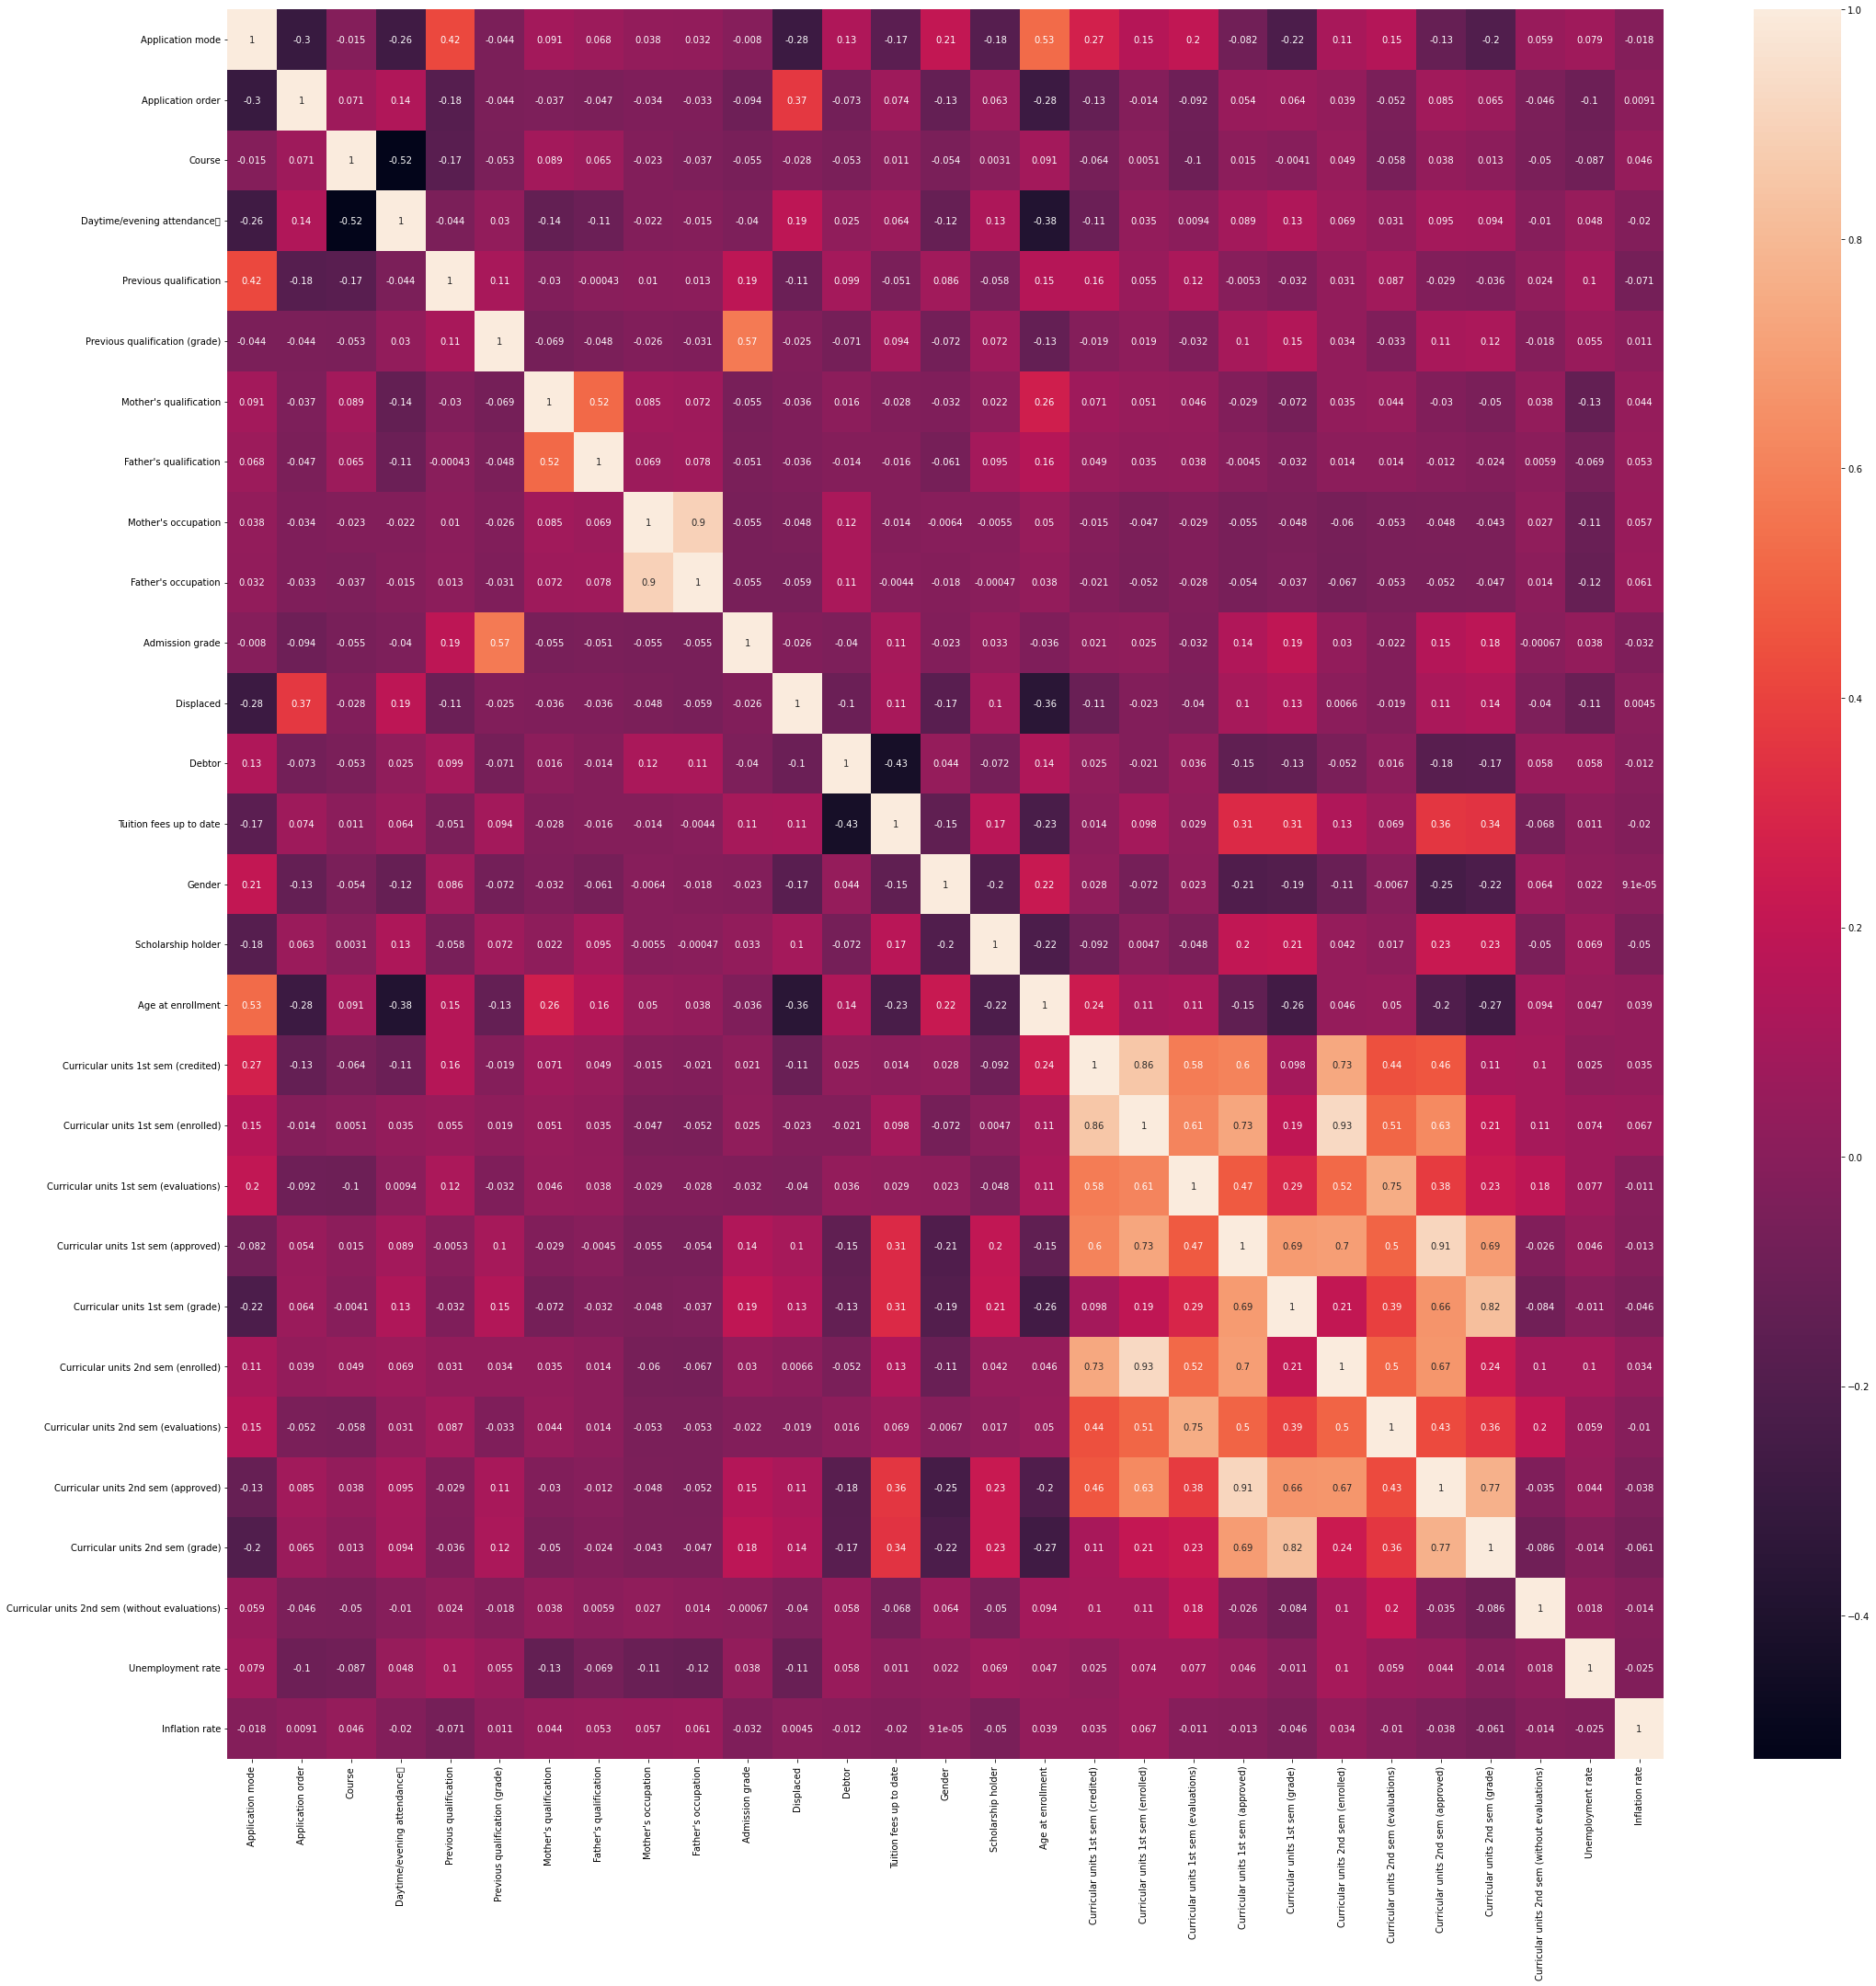

In [52]:
ex=ekdata.iloc[:, 0:29]
ey=ekdata.Target_Class

# We will follow the 75% 25% training and testing records split.
eX_train2, eX_test2, ey_train2, ey_test2 = train_test_split(ex, ey, test_size=0.25, stratify=ekdata.Target_Class, random_state=10)

corrmat = eX_train2.corr()
fig, ax = plt.subplots()
fig.set_size_inches(35,35)
sns.heatmap(corrmat,annot=True)

### From the correlation map, there is hardly any thing that can be dropped.
### Now, Refitting on the modified training sets.

## Decision Tree Classifer.

In [53]:
model1_3.fit(eX_train2, ey_train2)
trainScoreN= model1_3.score(eX_train2, ey_train2)
testScoreN= model1_3.score(eX_test2, ey_test2)

print("Accuracy on training set: {:.3f}".format(trainScoreN))
print("Accuracy on testing set: {:.3f}".format(testScoreN))

Accuracy on training set: 0.627
Accuracy on testing set: 0.510


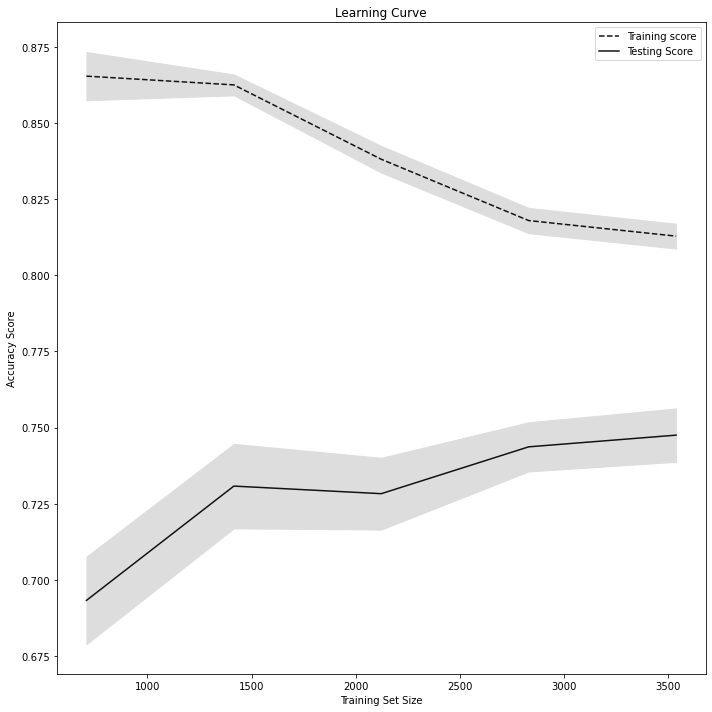

In [54]:
train_sizes, train_scores, test_scores =\
learning_curve(model1_3, x, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Confusion Matrix of DT with customizing depth=7 and minimum samples split=2


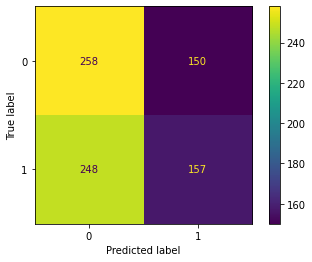

In [55]:
print("Confusion Matrix of DT with customizing depth=7 and minimum samples split=2")
y_pred1 = model1_3.predict(eX_test2)
confusion = confusion_matrix(ey_test2, y_pred1)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

In [56]:
target_names = ['Dropout','Graduate']
print(classification_report(ey_test2, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

     Dropout       0.51      0.63      0.56       408
    Graduate       0.51      0.39      0.44       405

    accuracy                           0.51       813
   macro avg       0.51      0.51      0.50       813
weighted avg       0.51      0.51      0.50       813



# ---------------------------------------------------------------------------------------------------------------

## KNN Classifier.

In [57]:
model2_2.fit(eX_train2, ey_train2)
trainScoreN= model2_2.score(eX_train2, ey_train2)
testScoreN= model2_2.score(eX_test2, ey_test2)

print("Accuracy on training set: {:.3f}".format(trainScoreN))
print("Accuracy on testing set: {:.3f}".format(testScoreN))

Accuracy on training set: 0.638
Accuracy on testing set: 0.515


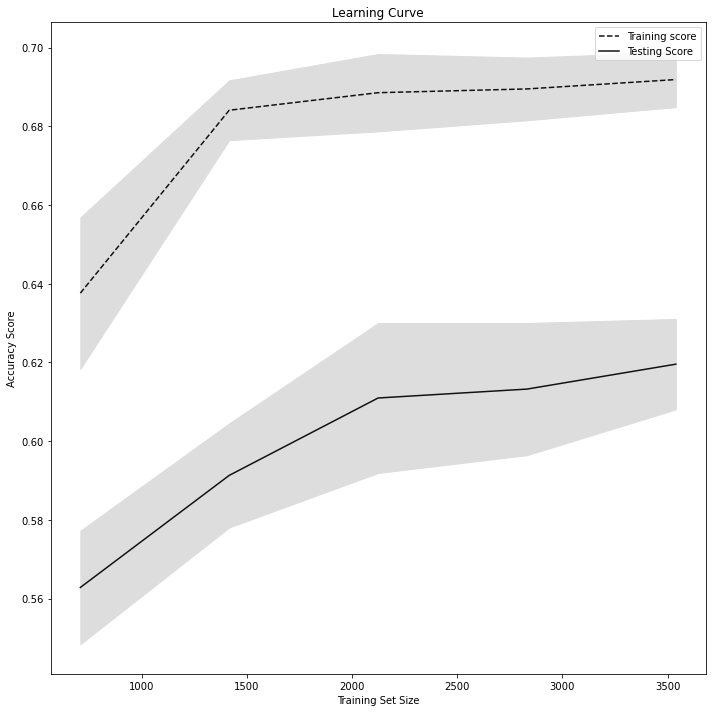

In [58]:
train_sizes, train_scores, test_scores =\
learning_curve(model2_2, x, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Confusion Matrix of DT with customizing depth=7 and minimum samples split=2


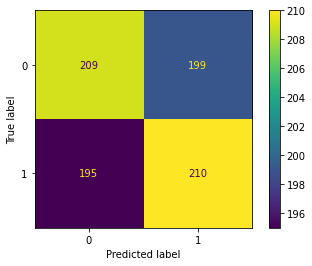

In [59]:
print("Confusion Matrix of DT with customizing depth=7 and minimum samples split=2")
y_pred2 = model2_2.predict(eX_test2)
confusion = confusion_matrix(ey_test2, y_pred2)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

In [60]:
target_names = ['Dropout','Graduate']
print(classification_report(ey_test2, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

     Dropout       0.52      0.51      0.51       408
    Graduate       0.51      0.52      0.52       405

    accuracy                           0.52       813
   macro avg       0.52      0.52      0.52       813
weighted avg       0.52      0.52      0.52       813



# --------------------------------------------------------------------------------------------------------------

## Random Forest Classifier.

In [61]:
model3_2.fit(eX_train2, ey_train2)
trainScoreN= model3_2.score(eX_train2, ey_train2)
testScoreN= model3_2.score(eX_test2, ey_test2)

print("Accuracy on training set: {:.3f}".format(trainScoreN))
print("Accuracy on testing set: {:.3f}".format(testScoreN))

Accuracy on training set: 0.994
Accuracy on testing set: 0.501


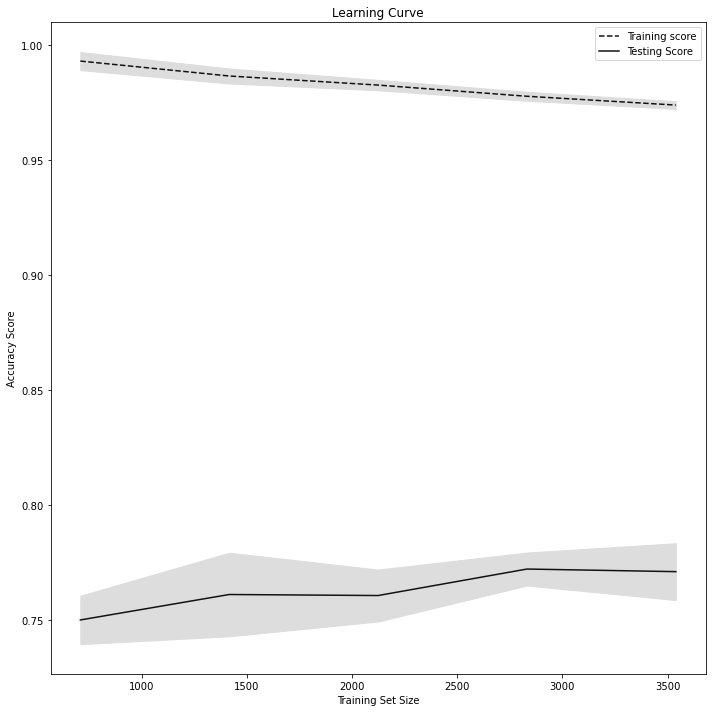

In [62]:
train_sizes, train_scores, test_scores =\
learning_curve(model3_2, x, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Confusion Matrix of DT with customizing depth=7 and minimum samples split=2


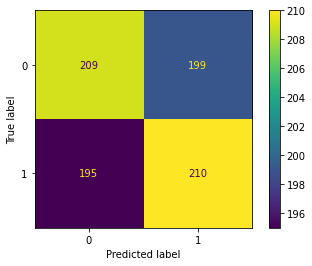

In [63]:
print("Confusion Matrix of DT with customizing depth=7 and minimum samples split=2")
y_pred3 = model3_2.predict(eX_test2)
confusion = confusion_matrix(ey_test2, y_pred2)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

In [64]:
target_names = ['Dropout','Graduate']
print(classification_report(ey_test2, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

     Dropout       0.50      0.53      0.52       408
    Graduate       0.50      0.47      0.48       405

    accuracy                           0.50       813
   macro avg       0.50      0.50      0.50       813
weighted avg       0.50      0.50      0.50       813



# --------------------------------------------------------------------------------------------------------------

## ROC Curves and Final Comments.

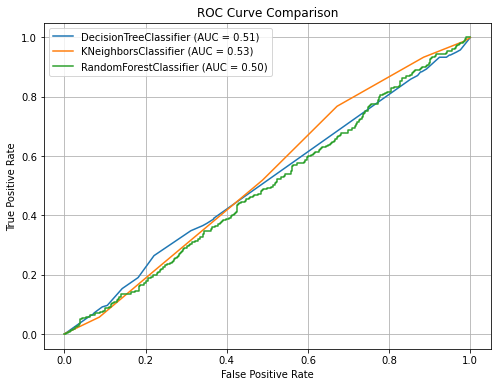

In [65]:
clfs = [
    model1_3,
    model2_2,
    model3_2
]

roc_curves = {}

for clf in clfs:
    name = clf.__class__.__name__
    y_probs = clf.predict_proba(eX_test2)[:, 1]
    fpr, tpr, _ = roc_curve(ey_test2, y_probs)
    roc_auc = auc(fpr, tpr)
    roc_curves[name] = (fpr, tpr, roc_auc)


plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc_score) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:0.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.title('ROC Curve Comparison')
plt.savefig('roc_comparison.png')

In [66]:
def best_threshold(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    best_thresh = None
    best_tpr = None
    best_fpr = None
    D = np.sqrt((1 - tpr) ** 2 + fpr ** 2)
    ix = np.argmin(D)
    best_thresh = thresholds[ix]
    best_tpr = tpr[ix]
    best_fpr = fpr[ix]
    
    return best_thresh, best_tpr, best_fpr

In [67]:
def compare_thresholds(clfs):
    df = pd.DataFrame(columns=['Classifier', 'Threshold', 'TPR', 'FPR', 'AUC', 'F1'])
    for clf in clfs:
        probas_ = clf.predict_proba(eX_test2)
        best_thresh, best_tpr, best_fpr = best_threshold(ey_test2, probas_[:, 1])
        f1 = f1_score(ey_test2, probas_[:, 1] > best_thresh)
        auc = roc_auc_score(ey_test2, probas_[:, 1]> best_thresh)
        acc = accuracy_score(ey_test2,probas_[:,1]>best_thresh)
        df = df.append({'Classifier': clf.__class__.__name__, 'Threshold': best_thresh, 'TPR': best_tpr, 'FPR': best_fpr, 'AUC': auc, 'F1': f1,'ACC': acc}, ignore_index=True)
    return df

In [68]:
compare_thresholds(clfs)

,Classifier,Threshold,TPR,FPR,AUC,F1,ACC
0,DecisionTreeClassifier,0.5,0.390123,0.367647,0.510004,0.441011,0.510455
1,KNeighborsClassifier,0.555556,0.518519,0.487745,0.495879,0.296041,0.496925
2,RandomForestClassifier,0.506651,0.441975,0.428922,0.505292,0.469657,0.505535


### The KNN shows better recall but also the highest false positive rate.
### The DecisionTree Classifier is the best overall performing model. However, there is not much variance in performance among the three.

## Overall:
### 1. The models' accuracy deteriorated after pre-processing the data despite having only 2 classes instead of three.
### 2. Before processing the data, DTC and RFC testing accuracy were average. However, their training accuracy was high which could mean that the models have overfitted the data. Moreover, KNN could not fit the data well. Its training accuracy was less that 70%.
### 3. After processing the data, the accuracy on the training and testing sets greatly deteriorated. Dropping features and outliers may have had an impact, that the models could not fit the data well apart from Random Forest Classifier. However, it showed a massive gap between training and testing accuracy which could mean that it overfitted the data.
### 4. The dataset had only 4424 records before pre-processing, and 3249 after processing. These records with over 30 features where some features can hold dozens of different values may have not been enough for the models to learn a pattern. That could be why the models performed poorly.
### 5. For future work, fitting and testing could be done on the dataset with no pre-processing except only deleting one class so as to be left with a binary classification problem.